In [34]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading Data and Exploration

In [36]:
# Load the data
weather_dataset = pd.read_csv('weather_classification_data.csv')

# Print first 5 rows
weather_dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Exploring the dataset

In [38]:
# Check number of rows and columns
weather_dataset.shape

(13200, 11)

In [39]:
# Check the dataset info and statistics
weather_dataset.info

<bound method DataFrame.info of        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV

In [40]:
weather_dataset.describe

<bound method NDFrame.describe of        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  

### Examine target variable

In [42]:
# Unique values of the 'Weather' column
unique_values = weather_dataset['Weather Type'].unique()
print(unique_values)

['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [43]:
# Unique value count of the 'Weather' column
count = weather_dataset['Weather Type'].nunique()
print(count)

4


In [44]:
# Occurrence count of unique values
occurrence_count = weather_dataset['Weather Type'].value_counts()
print(occurrence_count)

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


### Examine categorical input variables

In [46]:
print("Cloud Cover categories:", weather_dataset['Cloud Cover'].unique())
print("Season categories:", weather_dataset['Season'].unique())
print("Location categories:", weather_dataset['Location'].unique())

Cloud Cover categories: ['partly cloudy' 'clear' 'overcast' 'cloudy']
Season categories: ['Winter' 'Spring' 'Summer' 'Autumn']
Location categories: ['inland' 'mountain' 'coastal']


## Data Preprocessing

### Data Preprocessing with One-Hot Encoding and Standard-Scalar

In [55]:
# Define features and target
X = weather_dataset.drop('Weather Type', axis=1)
y = weather_dataset['Weather Type']

# Define categorical and numerical features
categorical_feats = ['Cloud Cover', 'Season', 'Location']
numerical_feats = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Create preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_feats),
        ('cat', OneHotEncoder(drop='first'), categorical_feats)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Exploratory Data Analysis

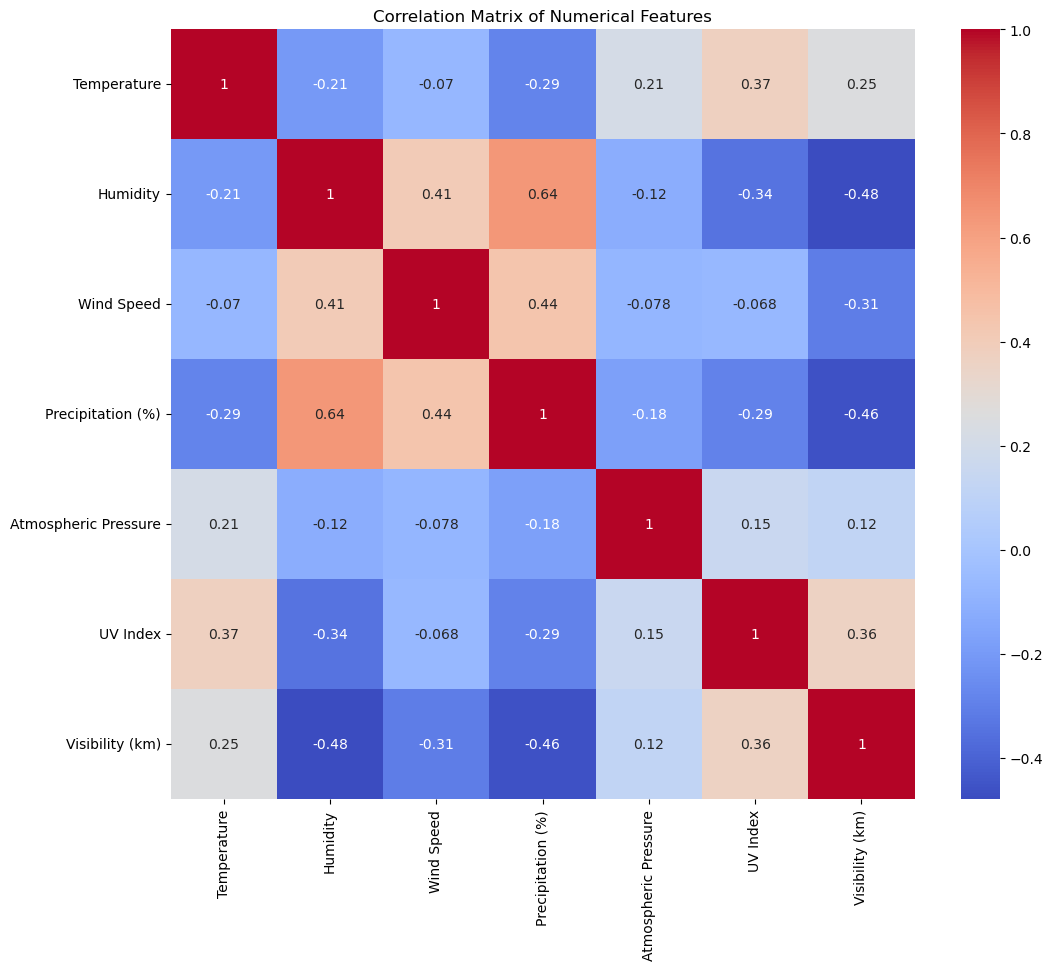

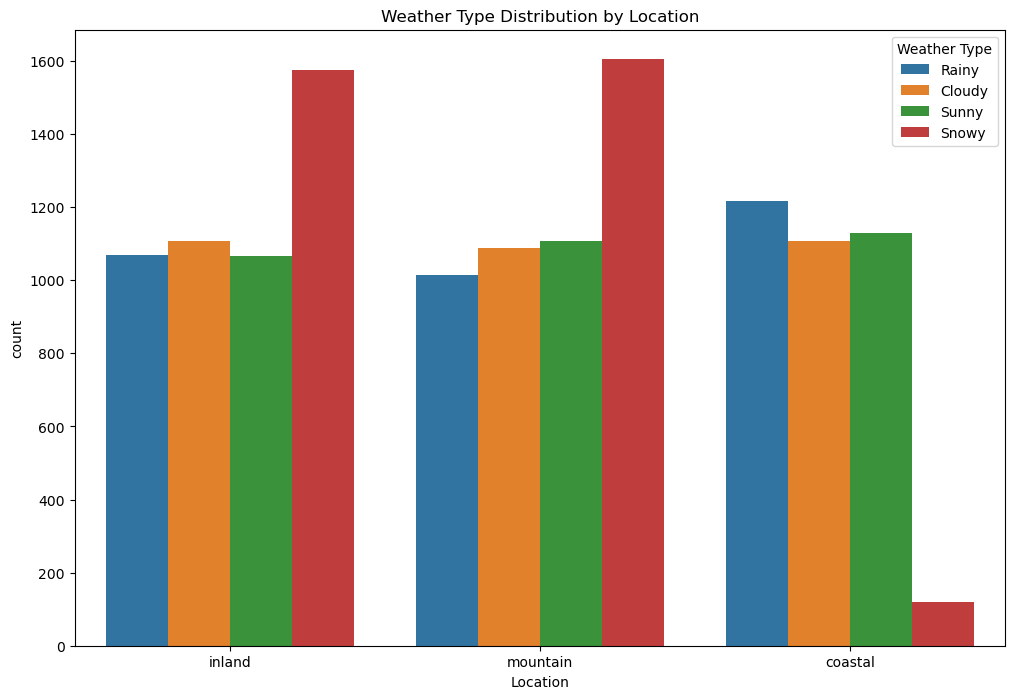

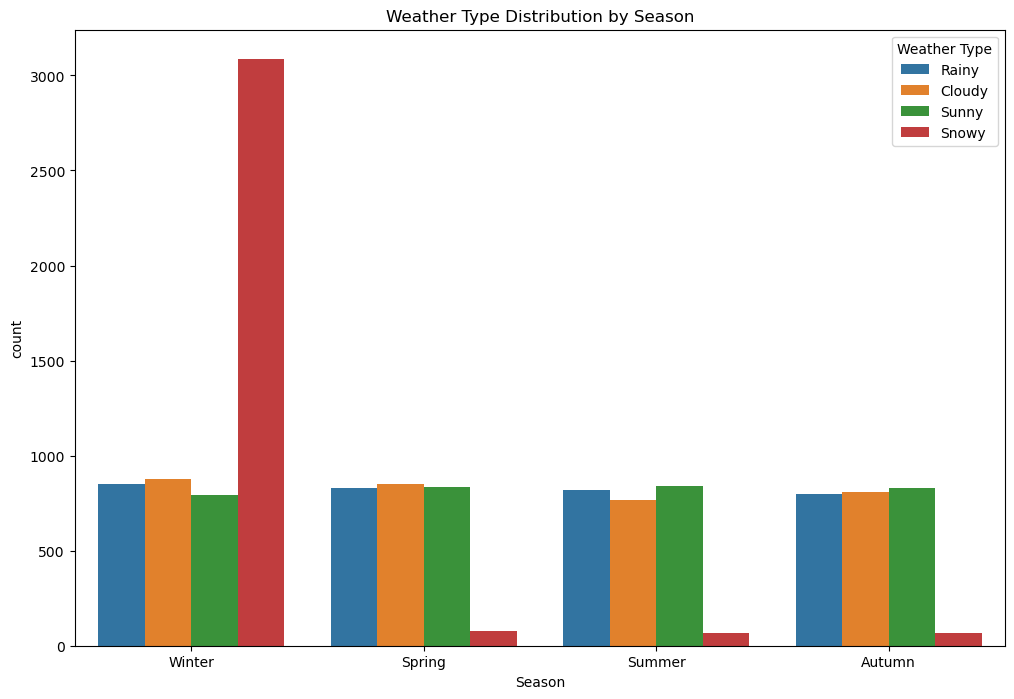

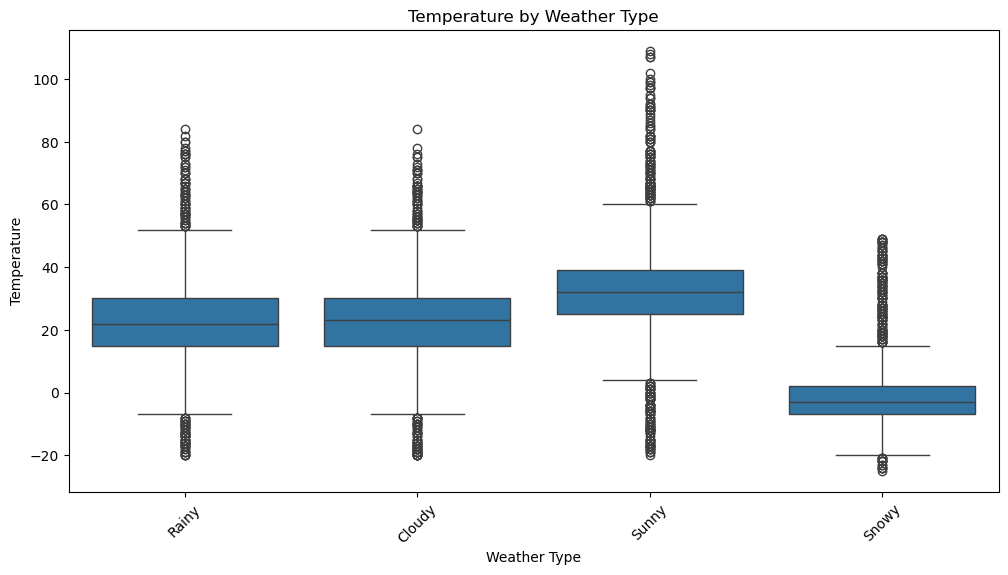

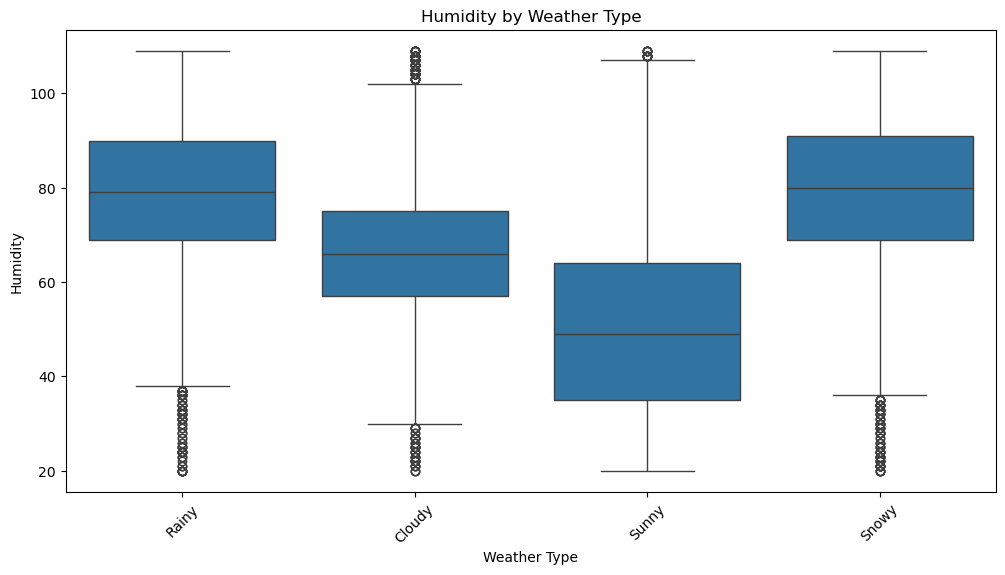

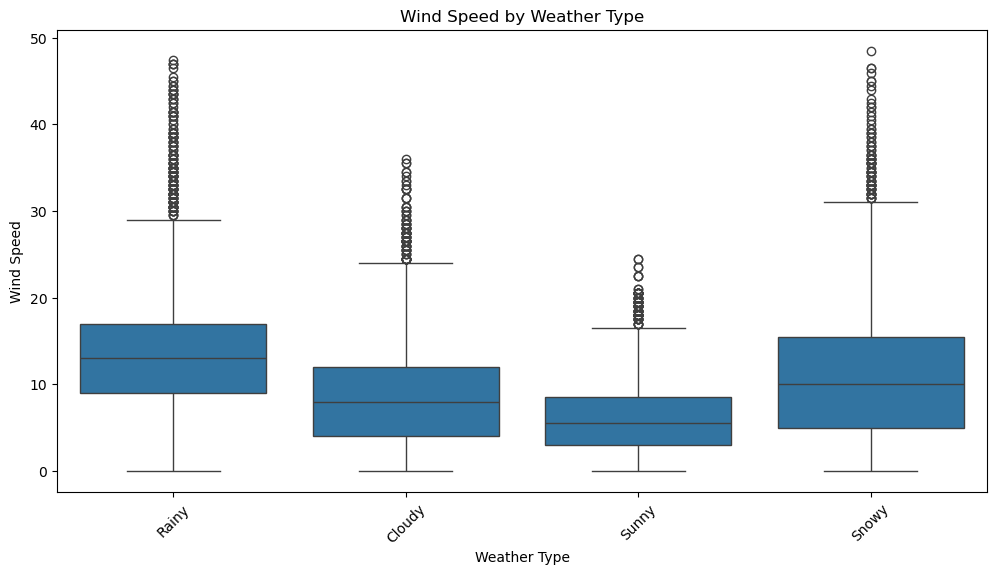

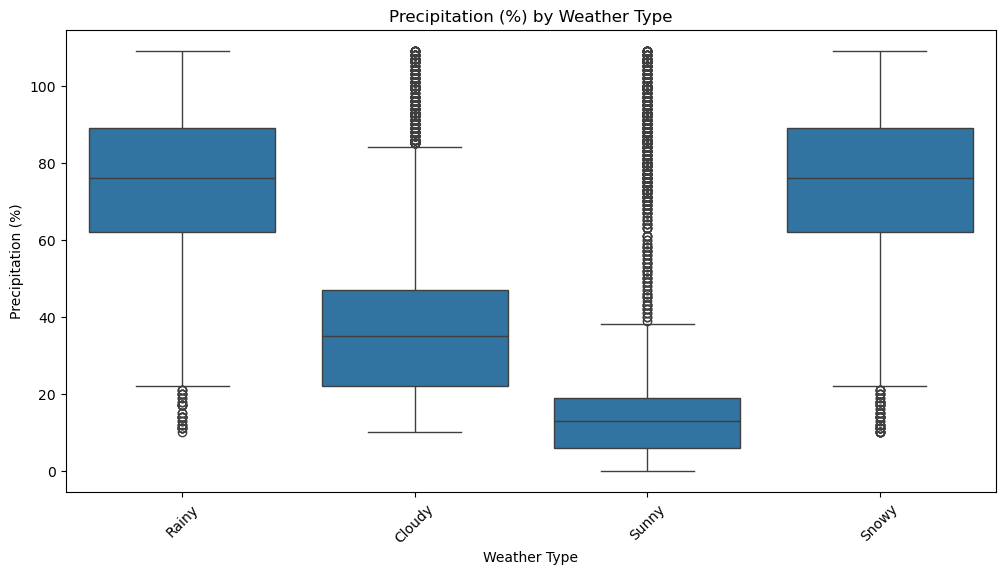

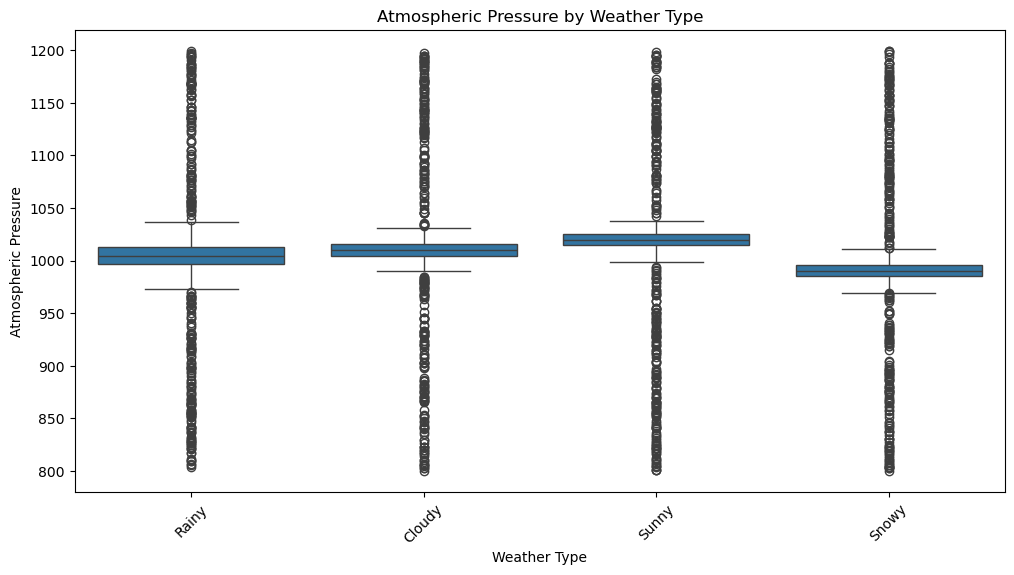

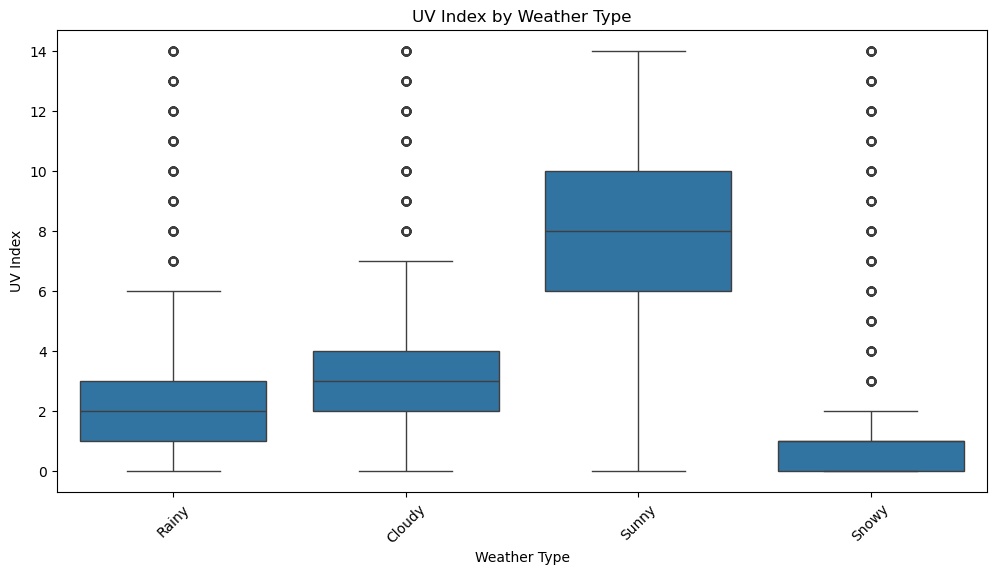

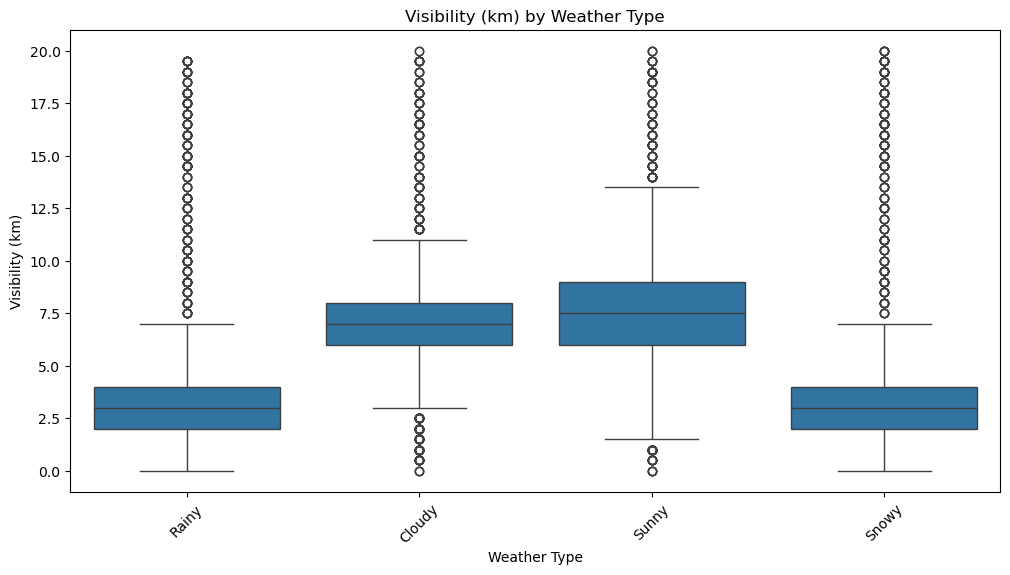

In [64]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation = weather_dataset[numerical_feats].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Weather Type by Location
plt.figure(figsize=(12, 8))
sns.countplot(data=weather_dataset, x='Location', hue='Weather Type')
plt.title('Weather Type Distribution by Location')
plt.show()

# Weather Type by Season
plt.figure(figsize=(12, 8))
sns.countplot(data=weather_dataset, x='Season', hue='Weather Type')
plt.title('Weather Type Distribution by Season')
plt.show()

# Boxplots for numerical features by Weather Type
for col in numerical_feats:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=weather_dataset, x='Weather Type', y=col)
    plt.title(f'{col} by Weather Type')
    plt.xticks(rotation=45)
    plt.show()

## Model Building and Evaluation


### Model Building: Creating KNN and Gaussian Naive Bayes pipelines


In [68]:
# Create pipeline with KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Create pipeline with Naive Bayes
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

### Train and evaluate the KNN model with confusion Matrix

In [84]:
# Train and evaluate KNN
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)


print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8876262626262627

KNN Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.83      0.87      0.85       955
       Rainy       0.86      0.89      0.87       982
       Snowy       0.93      0.93      0.93      1033
       Sunny       0.93      0.86      0.89       990

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960



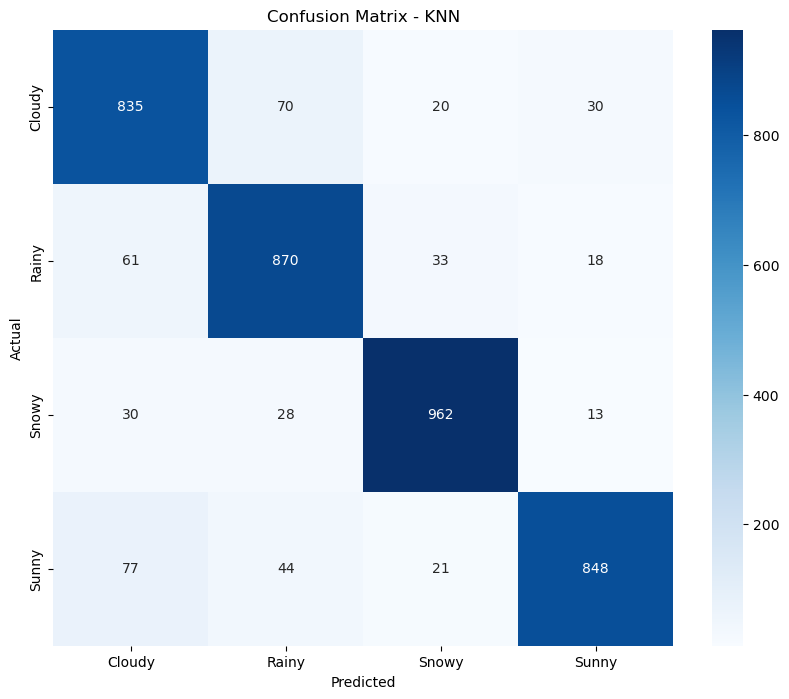

In [86]:
# Confusion Matrix for KNN
plt.figure(figsize=(10, 8))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
# Train and evaluate Naive Bayes
nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8328282828282828

Naive Bayes Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.89      0.78      0.83       955
       Rainy       0.78      0.74      0.76       982
       Snowy       0.81      0.93      0.87      1033
       Sunny       0.85      0.87      0.86       990

    accuracy                           0.83      3960
   macro avg       0.84      0.83      0.83      3960
weighted avg       0.83      0.83      0.83      3960



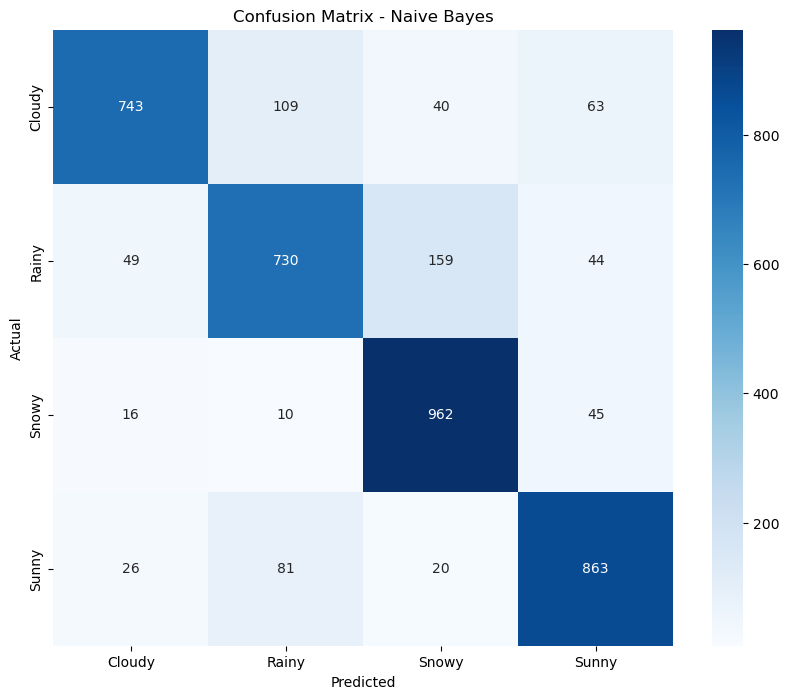

In [90]:
# Confusion Matrix for Naive Bayes
plt.figure(figsize=(10, 8))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [92]:
# Cross-validation for both models
cv_scores_knn = cross_val_score(knn_pipeline, X, y, cv=5)
cv_scores_nb = cross_val_score(nb_pipeline, X, y, cv=5)

print("KNN Cross-Validation Scores:", cv_scores_knn)
print("KNN Average CV Score:", cv_scores_knn.mean())

print("Naive Bayes Cross-Validation Scores:", cv_scores_nb)
print("Naive Bayes Average CV Score:", cv_scores_nb.mean())

KNN Cross-Validation Scores: [0.89166667 0.90378788 0.88712121 0.89166667 0.89128788]
KNN Average CV Score: 0.8931060606060607
Naive Bayes Cross-Validation Scores: [0.8219697  0.8375     0.83295455 0.82613636 0.81893939]
Naive Bayes Average CV Score: 0.8275
